# WeatherPy

In [1]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
# import openweathermapy as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
    

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [3]:
# Look at how the city dictionary is set up in the openweathermapy api
#units = imperial for temp in F and wind speed in mph
find_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
response = requests.get(find_url + api_key +"&q=tabou").json()
response

{'coord': {'lon': -7.36, 'lat': 4.42},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 73.85,
  'pressure': 1013.25,
  'humidity': 95,
  'temp_min': 73.85,
  'temp_max': 73.85,
  'sea_level': 1013.25,
  'grnd_level': 1010.18},
 'wind': {'speed': 3.85, 'deg': 203.019},
 'rain': {'3h': 0.25},
 'clouds': {'all': 100},
 'dt': 1561446179,
 'sys': {'message': 0.0067,
  'country': 'CI',
  'sunrise': 1561443638,
  'sunset': 1561488193},
 'timezone': 0,
 'id': 2281120,
 'name': 'Tabou',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
check_url = f"{url}{api_key}&q="

max_temp_f = []
humid = []
cloud = []
wind_mph = []
country = []
date = []
lat = []
long = []
name = []

count = 0

for city in cities:
    try:
        response = requests.get(check_url + city).json()
        count +=1
        max_temp_f.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response ['clouds']['all'])
        wind_mph.append(response ['wind']['speed'])
        country.append(response ['sys']['country'])
        date.append(response ['dt'])
        lat.append(response ['coord']['lat'])
        long.append(response ['coord']['lon'])
        name.append(response['name'])


        print(f"Processing Record {count} | {city}")
    except KeyError:
        print("City not found. Skipping...")

    
    
    

Processing Record 1 | bluff
Processing Record 2 | chicama
Processing Record 3 | broome
Processing Record 4 | busselton
Processing Record 5 | jamestown
Processing Record 6 | vardo
Processing Record 7 | faanui
Processing Record 8 | opuwo
City not found. Skipping...
Processing Record 10 | arraial do cabo
Processing Record 11 | rikitea
City not found. Skipping...
Processing Record 13 | atuona
Processing Record 14 | bathsheba
Processing Record 15 | hilo
City not found. Skipping...
Processing Record 17 | toora-khem
Processing Record 18 | victoria
Processing Record 19 | verkhnevilyuysk
Processing Record 20 | tottori
Processing Record 21 | vaini
City not found. Skipping...
City not found. Skipping...
Processing Record 24 | hobart
Processing Record 25 | upernavik
Processing Record 26 | tamandare
Processing Record 27 | ochamchira
Processing Record 28 | alto araguaia
Processing Record 29 | saint-augustin
Processing Record 30 | mataura
Processing Record 31 | avarua
Processing Record 32 | albany
Ci

Processing Record 252 | porto nacional
Processing Record 253 | urbano santos
Processing Record 254 | hithadhoo
Processing Record 255 | tateyama
Processing Record 256 | pemba
Processing Record 257 | senj
Processing Record 258 | nalut
Processing Record 259 | aripuana
Processing Record 260 | flin flon
Processing Record 261 | meulaboh
City not found. Skipping...
Processing Record 263 | half moon bay
Processing Record 264 | komsomolskiy
Processing Record 265 | marsh harbour
Processing Record 266 | acri
Processing Record 267 | pushkino
Processing Record 268 | alghero
Processing Record 269 | bosaso
Processing Record 270 | hambantota
City not found. Skipping...
Processing Record 272 | atar
Processing Record 273 | kirakira
Processing Record 274 | betare oya
Processing Record 275 | bonavista
Processing Record 276 | port hawkesbury
Processing Record 277 | ust-kuyga
Processing Record 278 | limbang
Processing Record 279 | sumbe
Processing Record 280 | jalu
Processing Record 281 | russell
City not f

Processing Record 501 | gari
Processing Record 502 | vidalia
Processing Record 503 | falkenberg
Processing Record 504 | karpathos
Processing Record 505 | bahia blanca
Processing Record 506 | palaikastron
Processing Record 507 | havoysund
Processing Record 508 | wakkanai
Processing Record 509 | kenai
Processing Record 510 | jumla
Processing Record 511 | margate
Processing Record 512 | san pedro de uraba
Processing Record 513 | gat
Processing Record 514 | nyurba
Processing Record 515 | tucupita
Processing Record 516 | antofagasta
Processing Record 517 | forio
Processing Record 518 | puksoozero
Processing Record 519 | gushikawa
Processing Record 520 | weinfelden
Processing Record 521 | tiznit
Processing Record 522 | biak
Processing Record 523 | karratha
Processing Record 524 | ouadda
Processing Record 525 | naze
Processing Record 526 | auki
Processing Record 527 | matara
Processing Record 528 | gizo
Processing Record 529 | san rafael
Processing Record 530 | kaeo
City not found. Skipping..

In [5]:
weather_dict = {
    "City": name,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": humid,
    "Lat": lat,
    "Lng": long,
    "Max Temp": max_temp_f,
    "Wind Speed": wind_mph
}

weather_df = pd.DataFrame(weather_dict)

weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,0,AU,1561446259,34,-23.58,149.07,66.83,10.51
1,Chicama,90,PE,1561446260,82,-7.84,-79.15,64.40,10.29
2,Broome,75,GB,1561446260,100,52.47,1.45,66.99,5.82
3,Busselton,66,AU,1561446261,56,-33.64,115.35,64.99,23.62
4,Jamestown,0,AU,1561446261,34,-33.21,138.60,58.19,5.35


In [6]:
# Save Data to csv
weather_df.to_csv(output_data_file)

In [7]:
weather_df.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

### Plotting the Data

Your objective is to build a series of scatter plots to showcase the following relationships:
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

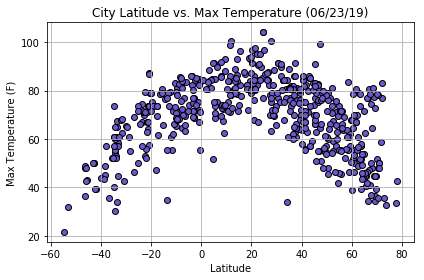

In [8]:
# Set x axis 
lat_axis = lat

#create scatter plot
plt.scatter(lat_axis, max_temp_f, marker="o", facecolors="slateblue", edgecolors="black")
plt.grid()
#add labels, titles, 
plt.title("City Latitude vs. Max Temperature (06/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tight_layout()

#save figure
plt.savefig("../Images/LatvsTemp.png")
plt.show()


#### Latitude vs. Humidity Plot

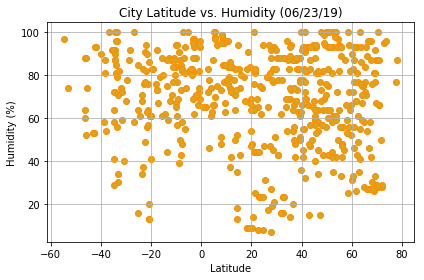

In [9]:
# Set x axis 
lat_axis = lat

#create scatter plot
plt.scatter(lat_axis, humid, marker="o", facecolors="goldenrod", edgecolors="darkorange")
plt.grid()
#add labels, titles, 
plt.title("City Latitude vs. Humidity (06/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# save figure
plt.savefig("../Images/LatvsHumidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

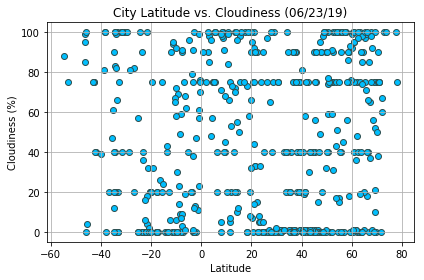

In [10]:
# Set x axis 
lat_axis = lat

#create scatter plot
plt.scatter(lat_axis, cloud, marker="o", facecolors="deepskyblue", edgecolors="darkslategrey")
plt.grid()
#add labels, titles, 
plt.title("City Latitude vs. Cloudiness (06/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()
# plt.xlim(min(lat)-5,max(lat)+5)
# plt.ylim(min(wind_mph)-5,wind_mph+5)

# save figure
plt.savefig("../Images/LatvsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

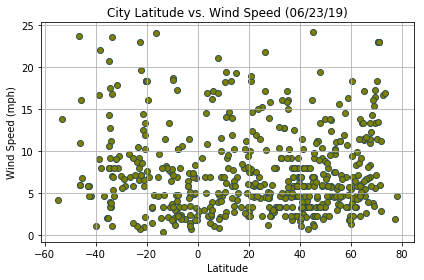

In [11]:
# Set x axis 
lat_axis = lat

#create scatter plot
plt.scatter(lat_axis, wind_mph, marker="o", facecolors="olive", edgecolors="darkslategrey")
plt.grid()
#add labels, titles, 
plt.title("City Latitude vs. Wind Speed (06/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.tight_layout()
# plt.xlim(min(lat)-5,max(lat)+5)
# plt.ylim(min(wind_mph)-5,wind_mph+5)

# save figure
plt.savefig("../Images/LatvsWindSpeed.png")
plt.show()

### Analysis
The Latitude vs. Max Temperature shows an arc where the lowest max temps occur on the min and max latitudes, where they are furthest from the equator. However the highest temperatures are around 23.5 N latitude which is knowns as the Tropic of Cancer and may be due to the tilt in the Earths Axis. Latitude does not seem to affect humidity percentages, cloudiness or wind speed. 
